## K-Nearest Neighbours Classifiers

In [26]:
# import essential libraries

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random

In [27]:
# defining a generator funtion to generate points in 2D space and label them as blue or orange class

def generate_points(num_points):
    points = {'blue': [], 'orange': []}
    for _ in range(num_points):
        blue_point = [random.uniform(1, 10), random.uniform(1, 10)]
        orange_point = [random.uniform(1, 10), random.uniform(1, 10)]
        points['blue'].append(blue_point)
        points['orange'].append(orange_point)
    return points

In [ ]:
num_points = int(input("Enter the number of points: "))
points = generate_points(num_points)
#print("Generated Points:")
#print("Blue:", generated_points['blue'])
#print("Orange:", generated_points['orange'])

In [4]:
# point for the assessment, essentially x$_0$

new_point = [3,3]

In [5]:
def minkowski_distance(a, b, p):
    """
    Compute the Minkowski distance between two vectors a and b.

    Parameters:
    
    When p = 1, the Minkowski distance corresponds to the Manhattan distance, 
    and when p = 2, it represents the Euclidean distance. 
    Consideration of the limit as p -> infinity can offer insights into the behavior of the distance metric.

    Returns:
    
    distance (float): The Minkowski distance between vectors a and b.
    """
    return np.sum(np.abs(np.array(a) - np.array(b)) ** p) ** (1/p)

In [6]:
# definition of KNN class for a classification problem

class KNearestNeighbors:

    def __init__(self, k=3):
        self.k = k
        self.points = None

    def fit(self, points):
        self.points = points

    def predict(self, new_point):
        distances = []

        for category in self.points:
            for point in self.points[category]:
                distance = minkowski_distance(point, new_point, 1)
                distances.append([distance, category])
                #print(f"Distance from {point} in category {category} to {new_point}: {distance} \n")

        categories = [category[1] for category in sorted(distances)[:self.k]]
        result = Counter(categories).most_common(1)[0][0]
        return result

In [7]:
clf = KNearestNeighbors(k=10)
clf.fit(points)
print(f'The predicted category of the {new_point} is {clf.predict(new_point)}')

The predicted category of the [3, 3] is orange


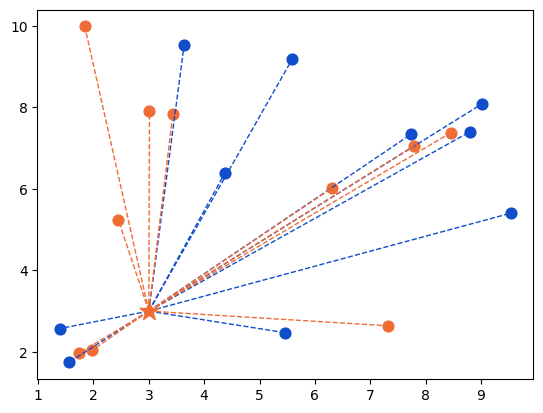

In [8]:
ax = plt.subplot()

for point in points['blue']:
    ax.scatter(point[0], point[1], color='#104DCA', s=60)

for point in points['orange']:
    ax.scatter(point[0], point[1], color='#EF6C35', s=60)

new_class = clf.predict(new_point)
color = '#EF6C35' if new_class == 'orange' else '#104DCA'
ax.scatter(new_point[0], new_point[1], color=color, marker='*', s=200, zorder=100)

for point in points['blue']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#104DCA', linestyle='--', linewidth=1)

for point in points['orange']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#EF6C35', linestyle='--', linewidth=1)

plt.show()

In [9]:
def generate_points(num_points):
    points = {'blue': [], 'orange': []}
    for _ in range(num_points):
        blue_point = [random.uniform(1, 10), random.uniform(1, 10), random.uniform(1, 10)]
        orange_point = [random.uniform(1, 10), random.uniform(1, 10), random.uniform(1, 10)]
        points['blue'].append(blue_point)
        points['orange'].append(orange_point)
    return points

In [10]:
num_points = int(input("Enter the number of points: "))
points = generate_points(num_points)
#print("Generated Points:")
#print("Blue:", generated_points['blue'])
#print("Orange:", generated_points['orange'])

Enter the number of points:  200


In [11]:
new_point = [3,3,6]

In [12]:
# By providing an odd number for k (number of neighbors), such as k=3, we ensure that the prediction does not end up with an equal chance when voting among the nearest neighbors.
clf = KNearestNeighbors(k=3)
clf.fit(points)
print(f'The predicted category of the {new_point} is {clf.predict(new_point)}')

The predicted category of the [3, 3, 6] is blue


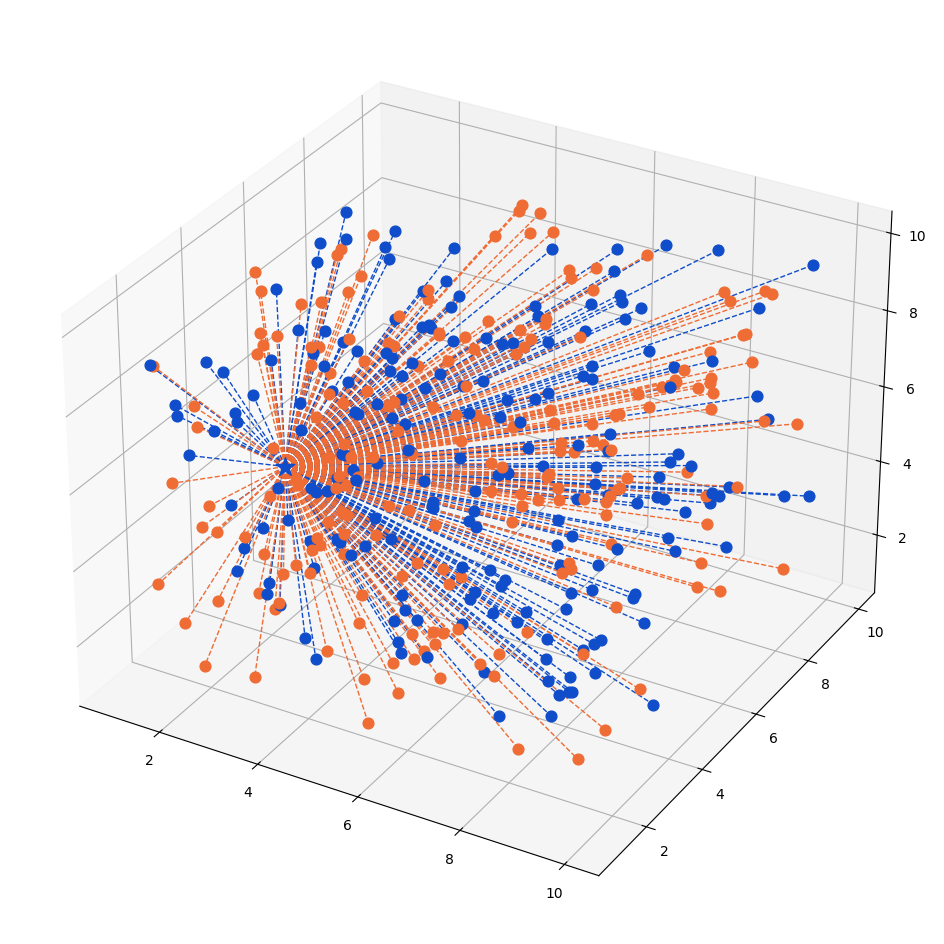

In [13]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for point in points['blue']:
    ax.scatter(point[0], point[1], point[2], color='#104DCA', s=60)

for point in points['orange']:
    ax.scatter(point[0], point[1], point[2], color='#EF6C35', s=60)

new_class = clf.predict(new_point)
color = '#EF6C35' if new_class == 'orange' else '#104DCA'
ax.scatter(new_point[0], new_point[1], new_point[2], color=color, marker='*', s=200, zorder=100)

for point in points['blue']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], [new_point[2], point[2]], color='#104DCA', linestyle='--', linewidth=1)

for point in points['orange']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], [new_point[2], point[2]], color='#EF6C35', linestyle='--', linewidth=1)

plt.show()

**This code is modifed from https://github.com/NeuralNine/youtube-tutorials/blob/main/K-Nearest%20Neighbors%20From%20Scratch/main.py**

## Decision Trees

In [14]:
from sklearn.datasets import load_iris

In [15]:
data = load_iris()

In [16]:
X, y = data.data, data.target

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf_en = DecisionTreeClassifier(criterion="entropy")
clf_en.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [18]:
from sklearn import tree

print(tree.export_text(clf_en))

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



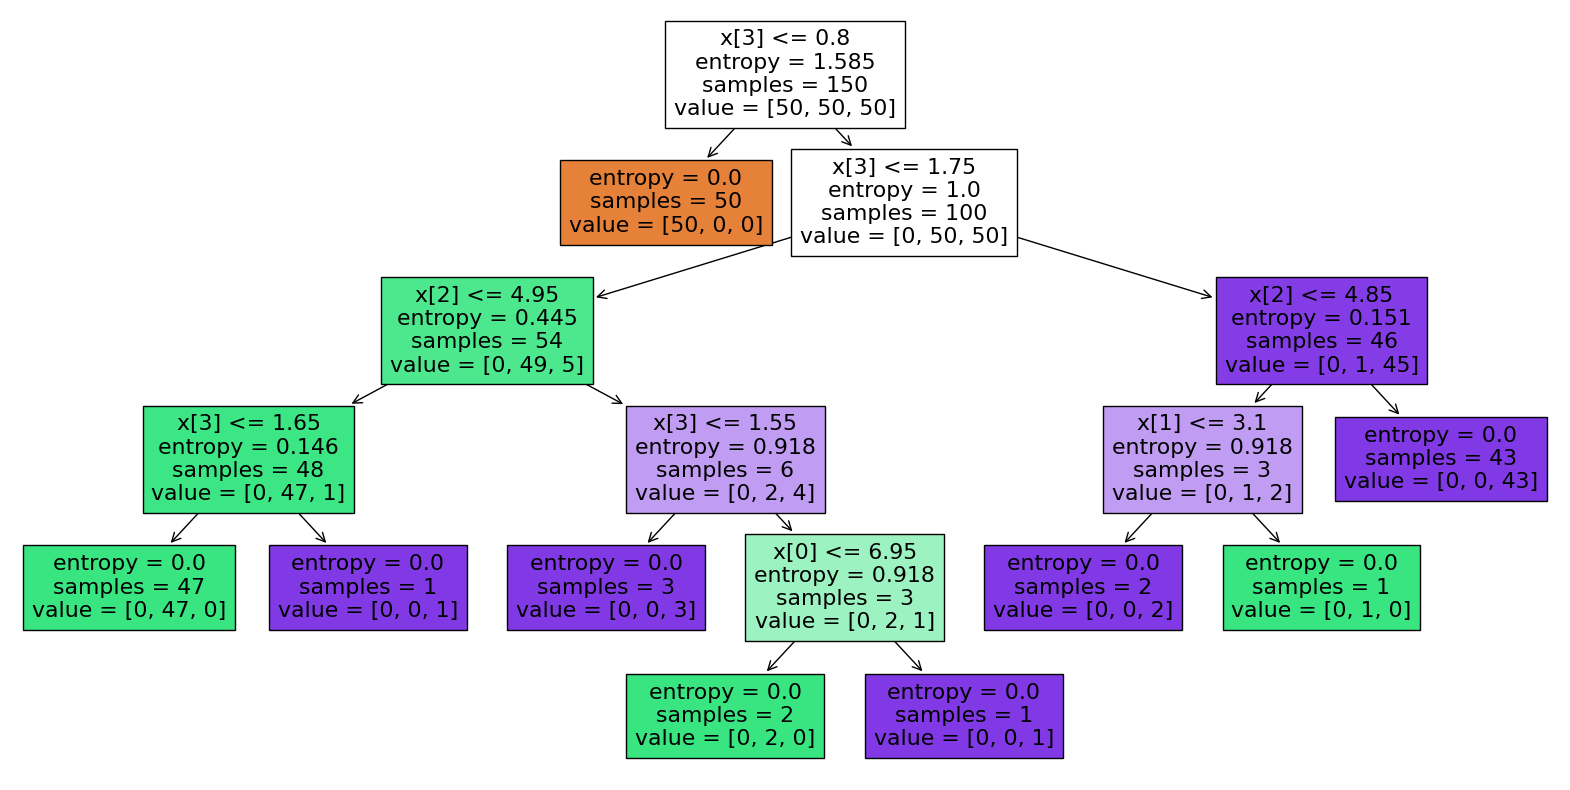

In [20]:
plt.figure(figsize=(20,10))  
_ = tree.plot_tree(clf_en, feature_names=None, class_names=None, filled=True)  
plt.show()

In [21]:
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X,y)

DecisionTreeClassifier()

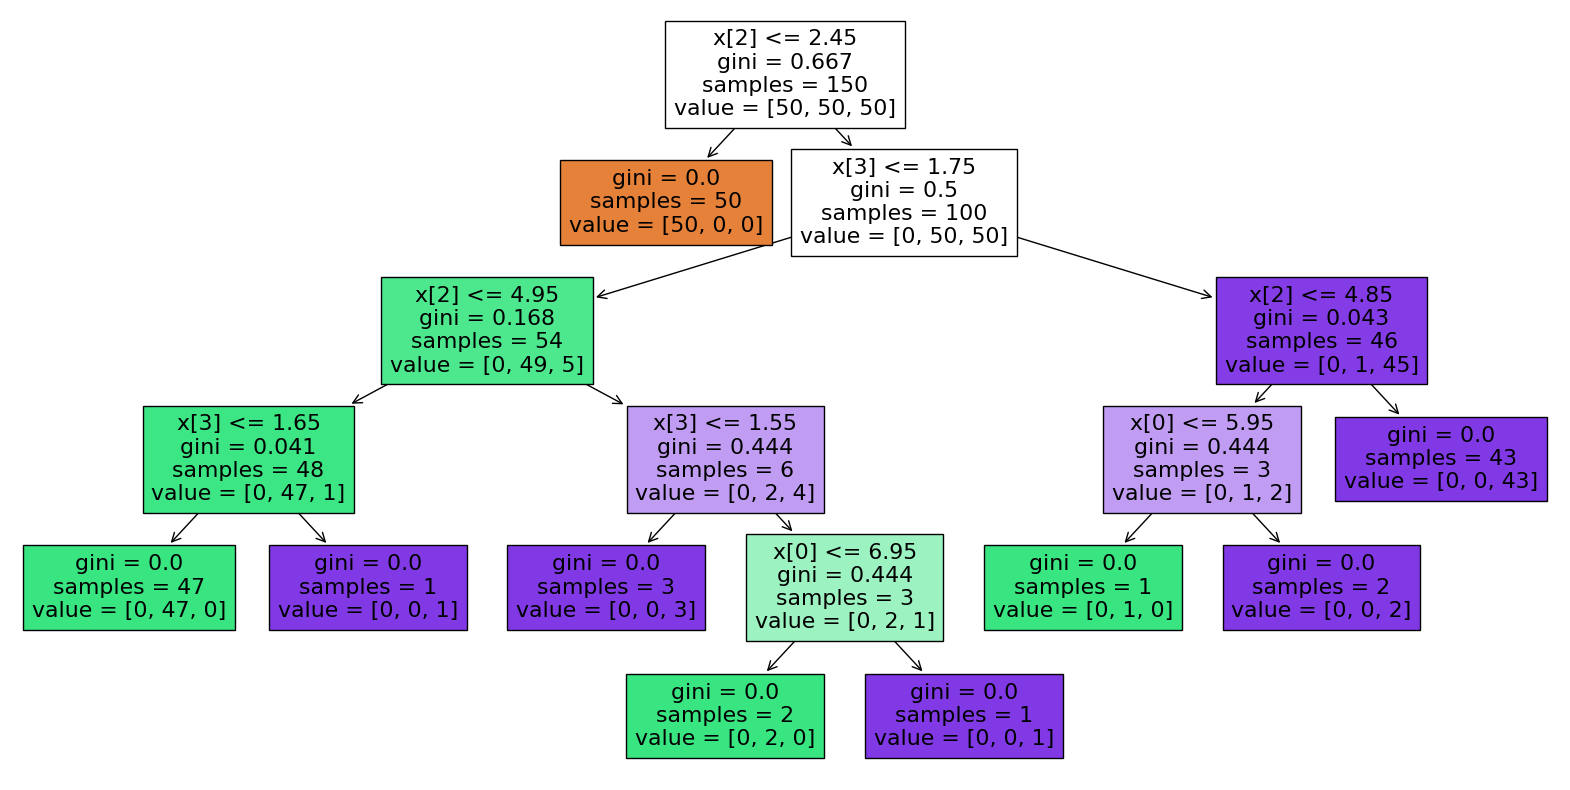

In [23]:

plt.figure(figsize=(20,10))  
_ = tree.plot_tree(clf_gini, feature_names=None, class_names=None, filled=True)
plt.show()